In [1]:
from pathlib import Path
import pprint
import os
import json

In [2]:
import numpy as np
import pandas as pd
import xarray as xr
import jmespath
from brainio_collection import list_stimulus_sets, list_assemblies, get_stimulus_set, get_assembly

Loading lookup from /braintree/home/jjpr/dev/brainio_collection/brainio_collection/lookup.csv


In [3]:
import plotly.express as px

In [4]:
from plotly.subplots import make_subplots

In [5]:
import plotly.graph_objects as go

In [6]:
from brainio_base.assemblies import NeuronRecordingAssembly

In [7]:
import scipy.io as sio

In [8]:
import re

In [9]:
source_netcdf_file = "/braintree/data2/active/users/jjpr/mkgu_packaging/crcns/v2-1/crcns_v2-1_neuronal.nc"

In [ ]:
v2 = NeuronRecordingAssembly(xr.open_dataarray(source_netcdf_file))
v2

In [ ]:
v2_nans = np.count_nonzero(np.isnan(v2))
print(v2.size - v2_nans)
print(v2_nans)
print(v2.size)
v2_nans/v2.size

In [10]:
example_csv_path = Path("/braintree/data2/active/users/jjpr/mkgu_packaging/crcns/v2-1/V2Data10/NatRev/data/e0052.edrev3.001.p1.mat.csv")

In [11]:
example_mat_path = Path("/braintree/data2/active/users/jjpr/mkgu_packaging/crcns/v2-1/V2Data10/NatRev/e0052/e0052.edrev3.001.p1.mat")

In [ ]:
example_csv = pd.read_csv(example_csv_path)
example_csv

In [ ]:
example_mat = sio.loadmat(example_mat_path)
example_mat

In [ ]:
example_mat["psth"].shape

In [ ]:
for k, v in example_mat.items():
    if hasattr(v, "shape"):
        print(f"{k}:  {v.dtype} {v.shape}")
    else: 
        print(f"{k}: {type(v)}")

In [12]:
v2_path = example_csv_path.parents[3]
v2_path

PosixPath('/braintree/data2/active/users/jjpr/mkgu_packaging/crcns/v2-1')

In [ ]:
v2_path_glob = pprint.pformat(list(example_csv_path.parents[3].glob("**")))
v2_path_glob

In [ ]:
v2_path_walk = pprint.pformat(list(os.walk(v2_path)))
v2_path_walk

In [ ]:
print(v2_path_glob)

In [ ]:
print(v2_path_walk)

In [ ]:
v2_tree_path = Path("/braintree/home/jjpr/dev/brainio_contrib/mkgu_packaging/gallant/v2/v2_dir_tree.json")

In [ ]:
v2_tree = json.load(v2_tree_path.open())
v2_tree

In [ ]:
type(v2_tree)

In [ ]:
jmespath.search("[*].type", v2_tree)

In [ ]:
jmespath.search("[*].keys(@)", v2_tree)

In [ ]:
jmespath.search("[0].name", v2_tree)

In [ ]:
jmespath.search("[0].contents.length(@)", v2_tree)

In [ ]:
dir()

In [ ]:
example_csv_df = pd.read_csv(example_csv_path)
example_csv_df

In [ ]:
example_mat["r"]

In [ ]:
type(example_mat["r"])

In [ ]:
example_mat["r"].shape

In [ ]:
example_mat["r"][:10,:]

In [ ]:
example_mat["r"][:100,:10]

In [ ]:
example_mat["r"][1000:1100,:10]

In [ ]:
ex_nanmean = np.nanmean(example_mat["r"], 1)
ex_nanmean

In [ ]:
ex_nanmean.shape

In [ ]:
np.isnan(ex_nanmean)

In [ ]:
sum(np.isnan(ex_nanmean))

In [ ]:
[f for f in v2_path.iterdir()]

In [13]:
summaries_glob = sorted(v2_path.glob("V2Data*/**/*summary_file.mat"))
[f.relative_to(v2_path) for f in summaries_glob]

[PosixPath('V2Data1/DGrat/e0022/e0022.edrev3.007.p1_summary_file.mat'),
 PosixPath('V2Data1/DGrat/e0026/e0026.edrev3.005.p1_summary_file.mat'),
 PosixPath('V2Data1/DGrat/e0031/e0031.edrev3.006.p1_summary_file.mat'),
 PosixPath('V2Data1/DGrat/e0031/e0031.edrev3.007.p1_summary_file.mat'),
 PosixPath('V2Data1/DGrat/e0033/e0033.edrev3.006.p1_summary_file.mat'),
 PosixPath('V2Data1/DGrat/e0033/e0033.edrev3.009.p1_summary_file.mat'),
 PosixPath('V2Data1/DGrat/e0034/e0034.edrev3.004.p1_summary_file.mat'),
 PosixPath('V2Data1/DGrat/e0035/e0035.edrev3.007.p1_summary_file.mat'),
 PosixPath('V2Data1/DGrat/e0046/e0046.edrev3.006.p1_summary_file.mat'),
 PosixPath('V2Data1/DGrat/e0050/e0050.edrev3.005.p1_summary_file.mat'),
 PosixPath('V2Data1/DGrat/e0066/e0066.edrev3.004.p1_summary_file.mat'),
 PosixPath('V2Data1/DGrat/e0072/e0072.edrev3.005.p1_summary_file.mat'),
 PosixPath('V2Data10/NatRev/e0052/e0052.edrev3.001.p1_summary_file.mat'),
 PosixPath('V2Data10/NatRev/e0053/e0053.edrev3.002.p1_summary_

In [14]:
len(summaries_glob)

417

In [ ]:
summaries_glob[0]

In [ ]:
# re.split('(\d+)', s.relative_to(v2_path).parts[0])
# (lambda s: s.relative_to(v2_path).parts[0] )(summaries_glob[0])
# (lambda s: re.split('(\d+)', s.relative_to(v2_path).parts[0]) )(summaries_glob[0])
(lambda s: int(re.findall('(\d+)', s.relative_to(v2_path).parts[0])[-1]) )(summaries_glob[0])

# [f.relative_to(v2_path) for f in summaries_glob]

In [15]:
dir_key = lambda s: int(re.findall('(\d+)', s.relative_to(v2_path).parts[0])[-1])
summaries_glob = sorted(summaries_glob, key=dir_key)
summaries_glob

[PosixPath('/braintree/data2/active/users/jjpr/mkgu_packaging/crcns/v2-1/V2Data1/DGrat/e0022/e0022.edrev3.007.p1_summary_file.mat'),
 PosixPath('/braintree/data2/active/users/jjpr/mkgu_packaging/crcns/v2-1/V2Data1/DGrat/e0026/e0026.edrev3.005.p1_summary_file.mat'),
 PosixPath('/braintree/data2/active/users/jjpr/mkgu_packaging/crcns/v2-1/V2Data1/DGrat/e0031/e0031.edrev3.006.p1_summary_file.mat'),
 PosixPath('/braintree/data2/active/users/jjpr/mkgu_packaging/crcns/v2-1/V2Data1/DGrat/e0031/e0031.edrev3.007.p1_summary_file.mat'),
 PosixPath('/braintree/data2/active/users/jjpr/mkgu_packaging/crcns/v2-1/V2Data1/DGrat/e0033/e0033.edrev3.006.p1_summary_file.mat'),
 PosixPath('/braintree/data2/active/users/jjpr/mkgu_packaging/crcns/v2-1/V2Data1/DGrat/e0033/e0033.edrev3.009.p1_summary_file.mat'),
 PosixPath('/braintree/data2/active/users/jjpr/mkgu_packaging/crcns/v2-1/V2Data1/DGrat/e0034/e0034.edrev3.004.p1_summary_file.mat'),
 PosixPath('/braintree/data2/active/users/jjpr/mkgu_packaging/crcns/v

In [ ]:
s = summaries_glob[-1]
mat = sio.loadmat(s)
for k, v in mat.items():
    if hasattr(v, "shape"):
        print(f"{k}:  {v.dtype} {v.shape}")
    else: 
        print(f"{k}: {type(v)}")

In [ ]:
mat["celldata"].dtype

In [ ]:
s

In [ ]:
type(mat["celldata"])

In [ ]:
mat["celldata"].shape

In [ ]:
mat["celldata"][0].shape

In [ ]:
mat["celldata"][0]

In [ ]:
mat["celldata"].dtype.fields

In [ ]:
[f"{name}:  {mat['celldata'][name]}" for name in mat["celldata"].dtype.names]

In [ ]:
summ_top_fields = {}
for s in summaries_glob:
    rel_path = s.relative_to(v2_path)
    mat = sio.loadmat(s)
    fields = {}
    for k, v in mat.items():
        if hasattr(v, "shape"):
            fields[k] = (v.dtype, v.shape)
        else: 
            fields[k] = type(v)
    summ_top_fields[rel_path] = fields
    print(rel_path, fields.keys())

In [ ]:
for k, v in summ_top_fields.items():
    print(k, v["celldata"][1])

In [ ]:
for k, v in summ_top_fields.items():
    print(k, v["celldata"][0].names)

In [ ]:
for k, v in summ_top_fields.items():
    print(v["celldata"][0].names[:12])

In [ ]:
for k, v in summ_top_fields.items():
    print(v["celldata"][0].names[12:22])

In [ ]:
for k, v in summ_top_fields.items():
    print(v["celldata"][0].names[22:])

In [ ]:
list(summ_top_fields.values())[-1]["celldata"][0].names

In [ ]:
('id',
 'cellid',
 'masterid',
 'rawid',
 'celldataid',
 'runclassid',
 'path',
 'resplen',
 'repcount',
 'respfile',
 'respvarname',
 'respfiletype',
 'nosync',
 'respfilefmt',
 'respfmtcode',
 'stimfile',
 'stimfiletype',
 'stimiconside',
 'stimfilecrf',
 'stimwindowsize',
 'stimfilefmt',
 'stimfmtcode',
 'addedby',
 'info',
 'lastmod',
 'stimpath',
 'stimspeedid',
 'spikes',
 'a_state',
 'singleid',
 'singlerawid',
 'area',
 'bad',
 'rawstimfile',
 'well')


In [ ]:
sample_fields = [
  'cellid',
  'resplen',
  'repcount',
  'respfile',
  'respfilefmt',
  'respvarname',
  'respfiletype',
  'spikes',
  'area'
]

In [16]:
celldatas = {}
for s in summaries_glob:
    rel_path = s.relative_to(v2_path)
    mat = sio.loadmat(s, squeeze_me=True)
    celldatas[rel_path] = mat["celldata"]
celldatas

{PosixPath('V2Data1/DGrat/e0022/e0022.edrev3.007.p1_summary_file.mat'): array((8846, 'e0022', 788, 2901, 0, 1, '/auto/data/archive/ed_data/e2004-03-18/', 7915, 1, 'e0022.edrev3.007.p1.mat', 'psth', 0, 0, 'PSTH', 0, 'gratrev2004-160.index60.1.pixel.imsm', 1, '160,160', 3.2, 160, 'pixel', 0, 'willmore', 'checkraw2cell.m', '2005-01-08 15:56:43', '/auto/data/archive/stimarchive/ED02/imsm/', 60, 5852, array([], dtype=float64), 773, 3796, 'V2', 0, 'index60.1', 1),
       dtype=[('id', 'O'), ('cellid', 'O'), ('masterid', 'O'), ('rawid', 'O'), ('celldataid', 'O'), ('runclassid', 'O'), ('path', 'O'), ('resplen', 'O'), ('repcount', 'O'), ('respfile', 'O'), ('respvarname', 'O'), ('respfiletype', 'O'), ('nosync', 'O'), ('respfilefmt', 'O'), ('respfmtcode', 'O'), ('stimfile', 'O'), ('stimfiletype', 'O'), ('stimiconside', 'O'), ('stimfilecrf', 'O'), ('stimwindowsize', 'O'), ('stimfilefmt', 'O'), ('stimfmtcode', 'O'), ('addedby', 'O'), ('info', 'O'), ('lastmod', 'O'), ('stimpath', 'O'), ('stimspeedid

In [ ]:
 len(celldatas)

In [ ]:
summ_rel_path, celldata = list(celldatas.items())[223]
summ_rel_path, celldata

In [ ]:
celldata.shape

In [ ]:
celldata["cellid"]

In [ ]:
type(celldata["cellid"])

In [ ]:
celldata["cellid"].shape

In [ ]:
celldata["cellid"].item()

In [ ]:
{n: celldata[n].item() for n in celldata.dtype.names}

In [ ]:
dict(summ_rel_path=summ_rel_path, **{n: celldata[n].item() for n in celldata.dtype.names})

In [17]:
celldatas_l = [dict(summ_rel_path=summ_rel_path, **{n: celldata[n].item() for n in celldata.dtype.names}) for summ_rel_path, celldata in celldatas.items()]
celldatas_l

[{'summ_rel_path': PosixPath('V2Data1/DGrat/e0022/e0022.edrev3.007.p1_summary_file.mat'),
  'id': 8846,
  'cellid': 'e0022',
  'masterid': 788,
  'rawid': 2901,
  'celldataid': 0,
  'runclassid': 1,
  'path': '/auto/data/archive/ed_data/e2004-03-18/',
  'resplen': 7915,
  'repcount': 1,
  'respfile': 'e0022.edrev3.007.p1.mat',
  'respvarname': 'psth',
  'respfiletype': 0,
  'nosync': 0,
  'respfilefmt': 'PSTH',
  'respfmtcode': 0,
  'stimfile': 'gratrev2004-160.index60.1.pixel.imsm',
  'stimfiletype': 1,
  'stimiconside': '160,160',
  'stimfilecrf': 3.2,
  'stimwindowsize': 160,
  'stimfilefmt': 'pixel',
  'stimfmtcode': 0,
  'addedby': 'willmore',
  'info': 'checkraw2cell.m',
  'lastmod': '2005-01-08 15:56:43',
  'stimpath': '/auto/data/archive/stimarchive/ED02/imsm/',
  'stimspeedid': 60,
  'spikes': 5852,
  'a_state': array([], dtype=float64),
  'singleid': 773,
  'singlerawid': 3796,
  'area': 'V2',
  'bad': 0,
  'rawstimfile': 'index60.1',
  'well': 1},
 {'summ_rel_path': PosixPat

In [18]:
celldatas_df = pd.DataFrame(celldatas_l)
celldatas_df

,summ_rel_path,id,cellid,masterid,rawid,celldataid,runclassid,path,resplen,repcount,...,stimpath,stimspeedid,spikes,a_state,singleid,singlerawid,area,bad,rawstimfile,well
0,V2Data1/DGrat/e0022/e0022.edrev3.007.p1_summar...,8846,e0022,788,2901,0,1,/auto/data/archive/ed_data/e2004-03-18/,7915,1,...,/auto/data/archive/stimarchive/ED02/imsm/,60.0,5852,[],773,3796,V2,0,index60.1,1
1,V2Data1/DGrat/e0026/e0026.edrev3.005.p1_summar...,8857,e0026,795,2929,0,1,/auto/data/archive/ed_data/e2004-03-21/,7842,1,...,/auto/data/archive/stimarchive/ED02/imsm/,60.0,1555,[],780,3824,V2,0,index60.1,2
2,V2Data1/DGrat/e0031/e0031.edrev3.006.p1_summar...,8872,e0031,802,2959,0,1,/auto/data/archive/ed_data/e2004-03-23/,2228,1,...,/auto/data/archive/stimarchive/ED02/imsm/,60.0,19,[],787,3855,V2,0,index60.1,2
3,V2Data1/DGrat/e0031/e0031.edrev3.007.p1_summar...,8873,e0031,802,2960,0,1,/auto/data/archive/ed_data/e2004-03-23/,1078,1,...,/auto/data/archive/stimarchive/ED02/imsm/,60.0,11,[],787,3856,V2,0,index60.1,2
4,V2Data1/DGrat/e0033/e0033.edrev3.006.p1_summar...,8887,e0033,806,2986,0,1,/auto/data/archive/ed_data/e2004-03-25/,7751,1,...,/auto/data/archive/stimarchive/ED02/imsm/,60.0,1378,[],791,3882,V2,0,index60.1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,V2Data20/NatRev/z0128/z0128.ezrev4.002.p1_summ...,9284,z0128,1073,3879,0,2,/auto/data/archive/zig_data/z2004-11-29/,600,12,...,/auto/data/archive/stimarchive/ED02/imsm/,60.0,573,[],1047,4776,V2,0,index60.conf,5
413,V2Data20/NatRev/z0129/z0129.ezrev4.002.p1_summ...,9286,z0129,1074,3884,0,2,/auto/data/archive/zig_data/z2004-12-01/,7987,1,...,/auto/data/archive/stimarchive/ED02/imsm/,60.0,653,[],1048,4781,V2,0,index60.1,5
414,V2Data20/NatRev/z0129/z0129.ezrev4.003.p1_summ...,9287,z0129,1074,3885,0,2,/auto/data/archive/zig_data/z2004-12-01/,600,10,...,/auto/data/archive/stimarchive/ED02/imsm/,60.0,43,[],1048,4782,V2,0,index60.conf,5
415,V2Data20/NatRev/z0131/z0131.ezrev4.001.p1_summ...,9288,z0131,1076,3887,0,2,/auto/data/archive/zig_data/z2004-12-01/,7964,1,...,/auto/data/archive/stimarchive/ED02/imsm/,60.0,847,[],1050,4784,V2,0,index60.1,5


In [ ]:
celldatas_df.apply(lambda r:  r["respfile"], axis=1)

In [ ]:
celldatas_df.apply(lambda r:  v2_path.joinpath(r["summ_rel_path"].with_name(r["respfile"])), axis=1)[0]

In [19]:
celldatas_df["respfile_rel_path"] = celldatas_df.apply(lambda r:  r["summ_rel_path"].with_name(r["respfile"]), axis=1)
celldatas_df

,summ_rel_path,id,cellid,masterid,rawid,celldataid,runclassid,path,resplen,repcount,...,stimspeedid,spikes,a_state,singleid,singlerawid,area,bad,rawstimfile,well,respfile_rel_path
0,V2Data1/DGrat/e0022/e0022.edrev3.007.p1_summar...,8846,e0022,788,2901,0,1,/auto/data/archive/ed_data/e2004-03-18/,7915,1,...,60.0,5852,[],773,3796,V2,0,index60.1,1,V2Data1/DGrat/e0022/e0022.edrev3.007.p1.mat
1,V2Data1/DGrat/e0026/e0026.edrev3.005.p1_summar...,8857,e0026,795,2929,0,1,/auto/data/archive/ed_data/e2004-03-21/,7842,1,...,60.0,1555,[],780,3824,V2,0,index60.1,2,V2Data1/DGrat/e0026/e0026.edrev3.005.p1.mat
2,V2Data1/DGrat/e0031/e0031.edrev3.006.p1_summar...,8872,e0031,802,2959,0,1,/auto/data/archive/ed_data/e2004-03-23/,2228,1,...,60.0,19,[],787,3855,V2,0,index60.1,2,V2Data1/DGrat/e0031/e0031.edrev3.006.p1.mat
3,V2Data1/DGrat/e0031/e0031.edrev3.007.p1_summar...,8873,e0031,802,2960,0,1,/auto/data/archive/ed_data/e2004-03-23/,1078,1,...,60.0,11,[],787,3856,V2,0,index60.1,2,V2Data1/DGrat/e0031/e0031.edrev3.007.p1.mat
4,V2Data1/DGrat/e0033/e0033.edrev3.006.p1_summar...,8887,e0033,806,2986,0,1,/auto/data/archive/ed_data/e2004-03-25/,7751,1,...,60.0,1378,[],791,3882,V2,0,index60.1,2,V2Data1/DGrat/e0033/e0033.edrev3.006.p1.mat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,V2Data20/NatRev/z0128/z0128.ezrev4.002.p1_summ...,9284,z0128,1073,3879,0,2,/auto/data/archive/zig_data/z2004-11-29/,600,12,...,60.0,573,[],1047,4776,V2,0,index60.conf,5,V2Data20/NatRev/z0128/z0128.ezrev4.002.p1.mat
413,V2Data20/NatRev/z0129/z0129.ezrev4.002.p1_summ...,9286,z0129,1074,3884,0,2,/auto/data/archive/zig_data/z2004-12-01/,7987,1,...,60.0,653,[],1048,4781,V2,0,index60.1,5,V2Data20/NatRev/z0129/z0129.ezrev4.002.p1.mat
414,V2Data20/NatRev/z0129/z0129.ezrev4.003.p1_summ...,9287,z0129,1074,3885,0,2,/auto/data/archive/zig_data/z2004-12-01/,600,10,...,60.0,43,[],1048,4782,V2,0,index60.conf,5,V2Data20/NatRev/z0129/z0129.ezrev4.003.p1.mat
415,V2Data20/NatRev/z0131/z0131.ezrev4.001.p1_summ...,9288,z0131,1076,3887,0,2,/auto/data/archive/zig_data/z2004-12-01/,7964,1,...,60.0,847,[],1050,4784,V2,0,index60.1,5,V2Data20/NatRev/z0131/z0131.ezrev4.001.p1.mat


In [20]:
celldatas_df["respfile_path"] = celldatas_df.apply(lambda r:  v2_path.joinpath(r["summ_rel_path"].with_name(r["respfile"])), axis=1)
celldatas_df

,summ_rel_path,id,cellid,masterid,rawid,celldataid,runclassid,path,resplen,repcount,...,spikes,a_state,singleid,singlerawid,area,bad,rawstimfile,well,respfile_rel_path,respfile_path
0,V2Data1/DGrat/e0022/e0022.edrev3.007.p1_summar...,8846,e0022,788,2901,0,1,/auto/data/archive/ed_data/e2004-03-18/,7915,1,...,5852,[],773,3796,V2,0,index60.1,1,V2Data1/DGrat/e0022/e0022.edrev3.007.p1.mat,/braintree/data2/active/users/jjpr/mkgu_packag...
1,V2Data1/DGrat/e0026/e0026.edrev3.005.p1_summar...,8857,e0026,795,2929,0,1,/auto/data/archive/ed_data/e2004-03-21/,7842,1,...,1555,[],780,3824,V2,0,index60.1,2,V2Data1/DGrat/e0026/e0026.edrev3.005.p1.mat,/braintree/data2/active/users/jjpr/mkgu_packag...
2,V2Data1/DGrat/e0031/e0031.edrev3.006.p1_summar...,8872,e0031,802,2959,0,1,/auto/data/archive/ed_data/e2004-03-23/,2228,1,...,19,[],787,3855,V2,0,index60.1,2,V2Data1/DGrat/e0031/e0031.edrev3.006.p1.mat,/braintree/data2/active/users/jjpr/mkgu_packag...
3,V2Data1/DGrat/e0031/e0031.edrev3.007.p1_summar...,8873,e0031,802,2960,0,1,/auto/data/archive/ed_data/e2004-03-23/,1078,1,...,11,[],787,3856,V2,0,index60.1,2,V2Data1/DGrat/e0031/e0031.edrev3.007.p1.mat,/braintree/data2/active/users/jjpr/mkgu_packag...
4,V2Data1/DGrat/e0033/e0033.edrev3.006.p1_summar...,8887,e0033,806,2986,0,1,/auto/data/archive/ed_data/e2004-03-25/,7751,1,...,1378,[],791,3882,V2,0,index60.1,2,V2Data1/DGrat/e0033/e0033.edrev3.006.p1.mat,/braintree/data2/active/users/jjpr/mkgu_packag...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,V2Data20/NatRev/z0128/z0128.ezrev4.002.p1_summ...,9284,z0128,1073,3879,0,2,/auto/data/archive/zig_data/z2004-11-29/,600,12,...,573,[],1047,4776,V2,0,index60.conf,5,V2Data20/NatRev/z0128/z0128.ezrev4.002.p1.mat,/braintree/data2/active/users/jjpr/mkgu_packag...
413,V2Data20/NatRev/z0129/z0129.ezrev4.002.p1_summ...,9286,z0129,1074,3884,0,2,/auto/data/archive/zig_data/z2004-12-01/,7987,1,...,653,[],1048,4781,V2,0,index60.1,5,V2Data20/NatRev/z0129/z0129.ezrev4.002.p1.mat,/braintree/data2/active/users/jjpr/mkgu_packag...
414,V2Data20/NatRev/z0129/z0129.ezrev4.003.p1_summ...,9287,z0129,1074,3885,0,2,/auto/data/archive/zig_data/z2004-12-01/,600,10,...,43,[],1048,4782,V2,0,index60.conf,5,V2Data20/NatRev/z0129/z0129.ezrev4.003.p1.mat,/braintree/data2/active/users/jjpr/mkgu_packag...
415,V2Data20/NatRev/z0131/z0131.ezrev4.001.p1_summ...,9288,z0131,1076,3887,0,2,/auto/data/archive/zig_data/z2004-12-01/,7964,1,...,847,[],1050,4784,V2,0,index60.1,5,V2Data20/NatRev/z0131/z0131.ezrev4.001.p1.mat,/braintree/data2/active/users/jjpr/mkgu_packag...


In [ ]:
celldatas_df.iloc[223]

In [ ]:
celldatas_df["cellid"].is_unique

In [23]:
%history

dir()
dir()
from pathlib import Path
import pprint
import os
import json
import numpy as np
import pandas as pd
import xarray as xr
import jmespath
from brainio_collection import list_stimulus_sets, list_assemblies, get_stimulus_set, get_assembly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from brainio_base.assemblies import NeuronRecordingAssembly
import scipy.io as sio
import re
source_netcdf_file = "/braintree/data2/active/users/jjpr/mkgu_packaging/crcns/v2-1/crcns_v2-1_neuronal.nc"
example_csv_path = Path("/braintree/data2/active/users/jjpr/mkgu_packaging/crcns/v2-1/V2Data10/NatRev/data/e0052.edrev3.001.p1.mat.csv")
example_mat_path = Path("/braintree/data2/active/users/jjpr/mkgu_packaging/crcns/v2-1/V2Data10/NatRev/e0052/e0052.edrev3.001.p1.mat")
v2_path = example_csv_path.parents[3]
v2_path
summaries_glob = sorted(v2_path.glob("V2Data*/**/*summary_file.mat"))
[f.relative_to(v2_path) for f in summaries_glob]
len(summaries

In [ ]:
celldatas_df.groupby("cellid").count()

In [ ]:
celldatas_df["respfile_rel_path"].is_unique

In [ ]:
celldatas_df["respfile_path"].apply(lambda p: p.exists())

In [ ]:
celldatas_df["respfile_path"].apply(lambda p: p.exists()).all()

In [ ]:
celldatas_df.iloc[223]["respfile_path"]

In [ ]:
example_resp_mat = sio.loadmat(celldatas_df.iloc[223]["respfile_path"], squeeze_me=True)
example_resp_mat

In [ ]:
repr(example_resp_mat.keys())

In [ ]:
example_resp_mat["h"]

In [21]:
def structured_to_dict(arr: np.ndarray): # per https://stackoverflow.com/a/67324508/1760084
    import numpy as np

    if np.ndim(arr) == 0:
        if arr.dtype.names == None:
            return arr.item()
        # accessing by int does *not* work when arr is a zero-dimensional array!
        return {k: structured_to_dict(arr[k]) for k in arr.dtype.names}
    return [structured_to_dict(v) for v in arr]

In [ ]:
structured_to_dict(example_resp_mat["h"])

In [ ]:
celldatas_df["respfile_path"].apply(lambda p: repr(sio.loadmat(p, squeeze_me=True).keys())).nunique()

In [ ]:
for p in celldatas_df["respfile_path"]:
    mat = sio.loadmat(p, squeeze_me=True)
    print(Path(p.parts[-4:]), repr(sorted(mat.keys())))

In [ ]:
sorted(example_resp_mat.keys())

In [ ]:
celldatas_df[celldatas_df["respfile_rel_path"].astype("str")=="V2Data15/NatRev/m0260/m0260.mac_review.001.mat"]

In [ ]:
celldatas_df.iloc[308]

In [ ]:
for row in celldatas_df.itertuples():
    p = row.respfile_path
    try:
        mat = sio.loadmat(p, squeeze_me=True)
        print(row.respfile_rel_path, repr(sorted(mat.keys())))
    except Exception as e:
        print(row.respfile_rel_path, e)

In [22]:
def get_resp_mat_keys(respfile_path):
    try:
        mat = sio.loadmat(respfile_path, squeeze_me=True)
        return repr(sorted(mat.keys()))
#         print(row.respfile_rel_path, repr(sorted(mat.keys())))
    except Exception as e:
        return repr(e)
#         print(respfile_path, e)
get_resp_mat_keys(celldatas_df.iloc[223]["respfile_path"])

"['__globals__', '__header__', '__version__', 'chanid', 'droptime', 'eyepos', 'fext', 'flist', 'fpath', 'freps', 'h', 'kHzdata', 'matfile', 'outpath', 'phototime', 'plxfn', 'psth', 'r', 'refreshperframe', 'rnz', 's', 'shortstimlist', 'sid', 'smoothspikes', 'spiketime', 'stimtime', 'trialcount', 'unitid', 'xpos', 'ypos']"

In [23]:
celldatas_df["resp_mat_keys"] = celldatas_df.apply(lambda row: get_resp_mat_keys(row["respfile_path"]), axis=1)
celldatas_df["resp_mat_keys"]

0      ['__globals__', '__header__', '__version__', '...
1      ['__globals__', '__header__', '__version__', '...
2      ['__globals__', '__header__', '__version__', '...
3      ['__globals__', '__header__', '__version__', '...
4      ['__globals__', '__header__', '__version__', '...
                             ...                        
412    ['__globals__', '__header__', '__version__', '...
413    ['__globals__', '__header__', '__version__', '...
414    ['__globals__', '__header__', '__version__', '...
415    ['__globals__', '__header__', '__version__', '...
416    ['__globals__', '__header__', '__version__', '...
Name: resp_mat_keys, Length: 417, dtype: object

In [ ]:
celldatas_df["resp_mat_keys"].unique()

In [ ]:
celldatas_df.iloc[223]["respfile_path"].name.split(".")[0]

In [24]:
celldatas_df["respload_esque_respvarname"] = celldatas_df["respfile_path"].apply(lambda p: p.name.split(".")[0])
celldatas_df["respload_esque_respvarname"]

0      e0022
1      e0026
2      e0031
3      e0031
4      e0033
       ...  
412    z0128
413    z0129
414    z0129
415    z0131
416    z0131
Name: respload_esque_respvarname, Length: 417, dtype: object

In [ ]:
celldatas_df.apply(lambda row: "Unknown" in row["resp_mat_keys"], axis=1).value_counts()

In [ ]:
celldatas_df.apply(lambda row: row["respload_esque_respvarname"] in row["resp_mat_keys"], axis=1).value_counts()

In [ ]:
celldatas_df.apply(lambda row: row["respvarname"] in row["resp_mat_keys"], axis=1).value_counts()

In [ ]:
celldatas_df["respvarname"].value_counts()

In [ ]:
celldatas_df["respload_esque_respvarname"].value_counts()

In [ ]:
celldatas_df[celldatas_df["respfile"].str.contains("andros")]["respfile"]

In [ ]:
(celldatas_df["cellid"]==celldatas_df["respload_esque_respvarname"]).value_counts()

In [ ]:
celldatas_df[["cellid", "respload_esque_respvarname"]].loc[celldatas_df["cellid"]!=celldatas_df["respload_esque_respvarname"]]

In [ ]:
celldatas_df["respfile_rel_path"].apply(lambda p: p.parts[-2])

In [ ]:
(celldatas_df["cellid"]==celldatas_df["respfile_rel_path"].apply(lambda p: p.parts[-2])).value_counts()

In [ ]:
r = example_resp_mat["r"]
r

In [ ]:
r.shape

In [ ]:
nanmean_r = np.nanmean(r, axis=0)
nanmean_r

In [ ]:
nanmean_r.shape

In [ ]:
example_resp_mat.keys()

In [ ]:
celldatas_df.iloc[223]["respfile_rel_path"]

In [ ]:
fig01 = px.imshow(r, aspect="equal")
# fig01.update_layout(autosize=False)
fig01.update_layout(width=r.shape[1]*1000)
fig01.update_layout(coloraxis_showscale=False)
# fig01.update_layout(title=str(celldatas_df.iloc[223]["respfile_rel_path"]))
fig01

In [25]:
def add_resp_info(s):
    out_d = {}
    if "Unknown" not in s["resp_mat_keys"]:
        mat = sio.loadmat(s["respfile_path"], squeeze_me=True)
        r = mat["r"]
        out_d["r"] = r
        out_d["r_shape"] = r.shape
    else:
        out_d["r"] = np.empty(shape=(0, 0))
        out_d["r_shape"] = (0, 0)
    return pd.Series(out_d)

In [26]:
celldatas_df[["r", "r_shape"]] = celldatas_df.apply(add_resp_info, axis=1)
celldatas_df

,summ_rel_path,id,cellid,masterid,rawid,celldataid,runclassid,path,resplen,repcount,...,area,bad,rawstimfile,well,respfile_rel_path,respfile_path,resp_mat_keys,respload_esque_respvarname,r,r_shape
0,V2Data1/DGrat/e0022/e0022.edrev3.007.p1_summar...,8846,e0022,788,2901,0,1,/auto/data/archive/ed_data/e2004-03-18/,7915,1,...,V2,0,index60.1,1,V2Data1/DGrat/e0022/e0022.edrev3.007.p1.mat,/braintree/data2/active/users/jjpr/mkgu_packag...,"['__globals__', '__header__', '__version__', '...",e0022,"[[1.0, nan, nan, nan, nan, nan, nan, nan, nan,...","(8000, 40)"
1,V2Data1/DGrat/e0026/e0026.edrev3.005.p1_summar...,8857,e0026,795,2929,0,1,/auto/data/archive/ed_data/e2004-03-21/,7842,1,...,V2,0,index60.1,2,V2Data1/DGrat/e0026/e0026.edrev3.005.p1.mat,/braintree/data2/active/users/jjpr/mkgu_packag...,"['__globals__', '__header__', '__version__', '...",e0026,"[[1.0, nan, nan, nan, nan, nan, nan, nan, nan,...","(8000, 36)"
2,V2Data1/DGrat/e0031/e0031.edrev3.006.p1_summar...,8872,e0031,802,2959,0,1,/auto/data/archive/ed_data/e2004-03-23/,2228,1,...,V2,0,index60.1,2,V2Data1/DGrat/e0031/e0031.edrev3.006.p1.mat,/braintree/data2/active/users/jjpr/mkgu_packag...,"['__globals__', '__header__', '__version__', '...",e0031,"[[0.0, nan, nan, nan, nan, nan, nan, nan, nan,...","(8000, 14)"
3,V2Data1/DGrat/e0031/e0031.edrev3.007.p1_summar...,8873,e0031,802,2960,0,1,/auto/data/archive/ed_data/e2004-03-23/,1078,1,...,V2,0,index60.1,2,V2Data1/DGrat/e0031/e0031.edrev3.007.p1.mat,/braintree/data2/active/users/jjpr/mkgu_packag...,"['__globals__', '__header__', '__version__', '...",e0031,"[[0.0, nan, nan, nan, nan, nan, nan], [0.0, na...","(8000, 7)"
4,V2Data1/DGrat/e0033/e0033.edrev3.006.p1_summar...,8887,e0033,806,2986,0,1,/auto/data/archive/ed_data/e2004-03-25/,7751,1,...,V2,0,index60.1,2,V2Data1/DGrat/e0033/e0033.edrev3.006.p1.mat,/braintree/data2/active/users/jjpr/mkgu_packag...,"['__globals__', '__header__', '__version__', '...",e0033,"[[0.0, nan, nan, nan, nan, nan, nan, nan, nan,...","(8000, 40)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,V2Data20/NatRev/z0128/z0128.ezrev4.002.p1_summ...,9284,z0128,1073,3879,0,2,/auto/data/archive/zig_data/z2004-11-29/,600,12,...,V2,0,index60.conf,5,V2Data20/NatRev/z0128/z0128.ezrev4.002.p1.mat,/braintree/data2/active/users/jjpr/mkgu_packag...,"['__globals__', '__header__', '__version__', '...",z0128,"[[1.0, nan, 0.0, 1.0, nan, 1.0, 1.0, nan, 1.0,...","(600, 39)"
413,V2Data20/NatRev/z0129/z0129.ezrev4.002.p1_summ...,9286,z0129,1074,3884,0,2,/auto/data/archive/zig_data/z2004-12-01/,7987,1,...,V2,0,index60.1,5,V2Data20/NatRev/z0129/z0129.ezrev4.002.p1.mat,/braintree/data2/active/users/jjpr/mkgu_packag...,"['__globals__', '__header__', '__version__', '...",z0129,"[[0.0, nan, nan, nan, nan, nan, nan, nan, nan,...","(8000, 33)"
414,V2Data20/NatRev/z0129/z0129.ezrev4.003.p1_summ...,9287,z0129,1074,3885,0,2,/auto/data/archive/zig_data/z2004-12-01/,600,10,...,V2,0,index60.conf,5,V2Data20/NatRev/z0129/z0129.ezrev4.003.p1.mat,/braintree/data2/active/users/jjpr/mkgu_packag...,"['__globals__', '__header__', '__version__', '...",z0129,"[[0.0, nan, 1.0, 0.0, nan, 0.0, 0.0, nan, 0.0,...","(600, 34)"
415,V2Data20/NatRev/z0131/z0131.ezrev4.001.p1_summ...,9288,z0131,1076,3887,0,2,/auto/data/archive/zig_data/z2004-12-01/,7964,1,...,V2,0,index60.1,5,V2Data20/NatRev/z0131/z0131.ezrev4.001.p1.mat,/braintree/data2/active/users/jjpr/mkgu_packag...,"['__globals__', '__header__', '__version__', '...",z0131,"[[0.0, nan, nan, nan, nan, nan, nan, nan, nan,...","(8000, 28)"


In [ ]:
for row in celldatas_df[celldatas_df.index%20==0].itertuples():
    mat = sio.loadmat(row.respfile_path, squeeze_me=True)
    responses = mat["r"]
    fig = px.imshow(responses, title=str(row.respfile_rel_path), aspect="equal")
    fig.show()

In [ ]:
celldatas_df["r_shape"].unique()

In [ ]:
rows=4
cols=4
fig02 = make_subplots(rows=rows, cols=cols)
fig02.update_layout(height=rows*200+250)
for i in range(rows*cols):
#     print(i, i//cols, i%cols)
    fig02.add_trace(px.imshow(celldatas_df.iloc[i].r.reshape((1000, -1))).data[0], row=i//cols+1, col=i%cols+1)
fig02.show()

In [ ]:
fig02 = px.imshow(responunique, title=str(row.respfile_rel_path), aspect="equal")
fig01 = px.imshow(r, aspect="equal")
# fig01.update_layout(autosize=False)
fig01.update_layout(width=r.shape[1]*1000)
fig01.update_layout(coloraxis_showscale=False)
# fig01.update_layout(title=str(celldatas_df.iloc[223]["respfile_rel_path"]))
fig01

In [ ]:
np.count_nonzero(np.isnan(example_resp_mat["r"]))/example_resp_mat["r"].size

In [27]:
def get_nans_per(row):
    r = row["r"]
    if hasattr(r, "size") and r.size > 0:
        return np.count_nonzero(np.isnan(r))/r.size
    return np.nan

In [28]:
celldatas_df["nans_per_raw"] = celldatas_df.apply(get_nans_per, axis=1)
celldatas_df

,summ_rel_path,id,cellid,masterid,rawid,celldataid,runclassid,path,resplen,repcount,...,bad,rawstimfile,well,respfile_rel_path,respfile_path,resp_mat_keys,respload_esque_respvarname,r,r_shape,nans_per_raw
0,V2Data1/DGrat/e0022/e0022.edrev3.007.p1_summar...,8846,e0022,788,2901,0,1,/auto/data/archive/ed_data/e2004-03-18/,7915,1,...,0,index60.1,1,V2Data1/DGrat/e0022/e0022.edrev3.007.p1.mat,/braintree/data2/active/users/jjpr/mkgu_packag...,"['__globals__', '__header__', '__version__', '...",e0022,"[[1.0, nan, nan, nan, nan, nan, nan, nan, nan,...","(8000, 40)",0.974500
1,V2Data1/DGrat/e0026/e0026.edrev3.005.p1_summar...,8857,e0026,795,2929,0,1,/auto/data/archive/ed_data/e2004-03-21/,7842,1,...,0,index60.1,2,V2Data1/DGrat/e0026/e0026.edrev3.005.p1.mat,/braintree/data2/active/users/jjpr/mkgu_packag...,"['__globals__', '__header__', '__version__', '...",e0026,"[[1.0, nan, nan, nan, nan, nan, nan, nan, nan,...","(8000, 36)",0.972628
2,V2Data1/DGrat/e0031/e0031.edrev3.006.p1_summar...,8872,e0031,802,2959,0,1,/auto/data/archive/ed_data/e2004-03-23/,2228,1,...,0,index60.1,2,V2Data1/DGrat/e0031/e0031.edrev3.006.p1.mat,/braintree/data2/active/users/jjpr/mkgu_packag...,"['__globals__', '__header__', '__version__', '...",e0031,"[[0.0, nan, nan, nan, nan, nan, nan, nan, nan,...","(8000, 14)",0.979705
3,V2Data1/DGrat/e0031/e0031.edrev3.007.p1_summar...,8873,e0031,802,2960,0,1,/auto/data/archive/ed_data/e2004-03-23/,1078,1,...,0,index60.1,2,V2Data1/DGrat/e0031/e0031.edrev3.007.p1.mat,/braintree/data2/active/users/jjpr/mkgu_packag...,"['__globals__', '__header__', '__version__', '...",e0031,"[[0.0, nan, nan, nan, nan, nan, nan], [0.0, na...","(8000, 7)",0.980429
4,V2Data1/DGrat/e0033/e0033.edrev3.006.p1_summar...,8887,e0033,806,2986,0,1,/auto/data/archive/ed_data/e2004-03-25/,7751,1,...,0,index60.1,2,V2Data1/DGrat/e0033/e0033.edrev3.006.p1.mat,/braintree/data2/active/users/jjpr/mkgu_packag...,"['__globals__', '__header__', '__version__', '...",e0033,"[[0.0, nan, nan, nan, nan, nan, nan, nan, nan,...","(8000, 40)",0.974556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,V2Data20/NatRev/z0128/z0128.ezrev4.002.p1_summ...,9284,z0128,1073,3879,0,2,/auto/data/archive/zig_data/z2004-11-29/,600,12,...,0,index60.conf,5,V2Data20/NatRev/z0128/z0128.ezrev4.002.p1.mat,/braintree/data2/active/users/jjpr/mkgu_packag...,"['__globals__', '__header__', '__version__', '...",z0128,"[[1.0, nan, 0.0, 1.0, nan, 1.0, 1.0, nan, 1.0,...","(600, 39)",0.540256
413,V2Data20/NatRev/z0129/z0129.ezrev4.002.p1_summ...,9286,z0129,1074,3884,0,2,/auto/data/archive/zig_data/z2004-12-01/,7987,1,...,0,index60.1,5,V2Data20/NatRev/z0129/z0129.ezrev4.002.p1.mat,/braintree/data2/active/users/jjpr/mkgu_packag...,"['__globals__', '__header__', '__version__', '...",z0129,"[[0.0, nan, nan, nan, nan, nan, nan, nan, nan,...","(8000, 33)",0.964769
414,V2Data20/NatRev/z0129/z0129.ezrev4.003.p1_summ...,9287,z0129,1074,3885,0,2,/auto/data/archive/zig_data/z2004-12-01/,600,10,...,0,index60.conf,5,V2Data20/NatRev/z0129/z0129.ezrev4.003.p1.mat,/braintree/data2/active/users/jjpr/mkgu_packag...,"['__globals__', '__header__', '__version__', '...",z0129,"[[0.0, nan, 1.0, 0.0, nan, 0.0, 0.0, nan, 0.0,...","(600, 34)",0.530049
415,V2Data20/NatRev/z0131/z0131.ezrev4.001.p1_summ...,9288,z0131,1076,3887,0,2,/auto/data/archive/zig_data/z2004-12-01/,7964,1,...,0,index60.1,5,V2Data20/NatRev/z0131/z0131.ezrev4.001.p1.mat,/braintree/data2/active/users/jjpr/mkgu_packag...,"['__globals__', '__header__', '__version__', '...",z0131,"[[0.0, nan, nan, nan, nan, nan, nan, nan, nan,...","(8000, 28)",0.963817


In [ ]:
celldatas_df.iloc[::10]

In [ ]:
[np.unique(r[~np.isnan(r)]) for r in celldatas_df["r"]]

In [ ]:
r = celldatas_df.iloc[223]["r"]
paper_height = r.shape[0]
paper_width = r.shape[1]
margin = 100
height = 2*margin + paper_height
width = 2*margin + paper_width
fig = px.imshow(r, aspect="equal")
fig.update_layout(height=height, width=width, margin=dict(l=margin, r=margin, t=margin, b=margin))
fig.show()
fig.show("json")

In [ ]:
print(fig.layout.width)
# fig.show()

In [ ]:
fig.data

In [ ]:
fig.layout

In [ ]:
len(celldatas_df)

In [ ]:
list(celldatas_df.iloc[::10].index)

In [ ]:
celldatas_df.iloc[::10].iloc[11]

In [ ]:
step = 10
df = celldatas_df.iloc[::step]
cols = 4
rows = len(df)//cols + (1 if len(df)%cols else 0)
margin = 50
max_height = 500
height = 2*rows*margin + rows*max_height

fig = make_subplots(rows=rows, cols=cols, vertical_spacing=)
for i in range(len(df)):
    r = df.iloc[i].r
    fig.add_trace(px.imshow(r[:max_height, :]).data[0], row=i//cols+1, col=i%cols+1)
fig.update_layout(height=height)
fig.update_layout(coloraxis_showscale=False)
fig.update_yaxes(autorange="reversed")
fig.show()

In [ ]:
print(8000*73)
print(8000*73//500)
print(500*225)
print((8000*73)//(500*225) + (1 if (8000*73)%(500*225) else 0))


In [ ]:
def reshape(r, paper_height, paper_width):
    orig_aspect = r.shape[1]/r.shape[0]
    paper_aspect = paper_width/paper_height
    

In [ ]:
step = 10
df = celldatas_df.iloc[::step]
cols = 4
rows = len(df)//cols + (1 if len(df)%cols else 0)
margin = 50
paper_height = 500
total_height = (2*margin) + ((rows-1)*margin) + (rows*paper_height)
paper_width = 225
total_width = (2*margin) + ((cols-1)*margin) + (cols*paper_width)

fig = make_subplots(rows=rows, cols=cols)
fig.update_layout(height=total_height, width=total_width, margin=dict(l=margin, r=margin, t=margin, b=margin))

for i in range(len(df)):
    r = df.iloc[i].r
    fig.add_trace(go.Heatmap(z=r[:max_height, :]), row=i//cols+1, col=i%cols+1)
fig.update_layout(height=height)
fig.update_layout(coloraxis_showscale=False)
fig.update_yaxes(autorange="reversed")
fig.show()

In [ ]:
((500-2*100-3*50)/(3-1))/500

In [ ]:
fig = make_subplots(3, 2, vertical_spacing=((500-2*100-3*50)/(3-1))/500) # should give 75 pixels of spacing
fig.update_layout(height=500)
fig.update_layout(margin=dict(t=100, b=100, l=100, r=100))
for i in range(2):
    for j in range(3):
        fig.add_trace(go.Scatter(x=[1, 2, 3], y=[4, 5, 6]), row=j+1, col=i+1)
fig.show()

In [ ]:
cols = 2
rows = 3
margin = 50
paper_height = 100
total_height = (rows+1)*margin + rows*paper_height
vertical_spacing=margin/(total_height - 2*margin)
paper_width = 225
total_width = (cols+1)*margin + cols*paper_width
horizontal_spacing = margin/(total_width - 2*margin)

fig = make_subplots(rows, cols, vertical_spacing=vertical_spacing, horizontal_spacing=horizontal_spacing) 
fig.update_layout(height=total_height, width=total_width)
fig.update_layout(margin=dict(t=margin, b=margin, l=margin, r=margin))
fig.update_yaxes(autorange="reversed")
for i in range(cols):
    for j in range(rows):
        fig.add_trace(go.Heatmap(z=np.identity(10), showscale=False), row=j+1, col=i+1)
fig.show()
print(f"cols: {cols}  rows: {rows}")
print(f"margin: {margin}  paper height: {paper_height}  paper width: {paper_width}")
print(f"total height: {total_height}  total width: {total_width}")

In [ ]:
np.identity(10)

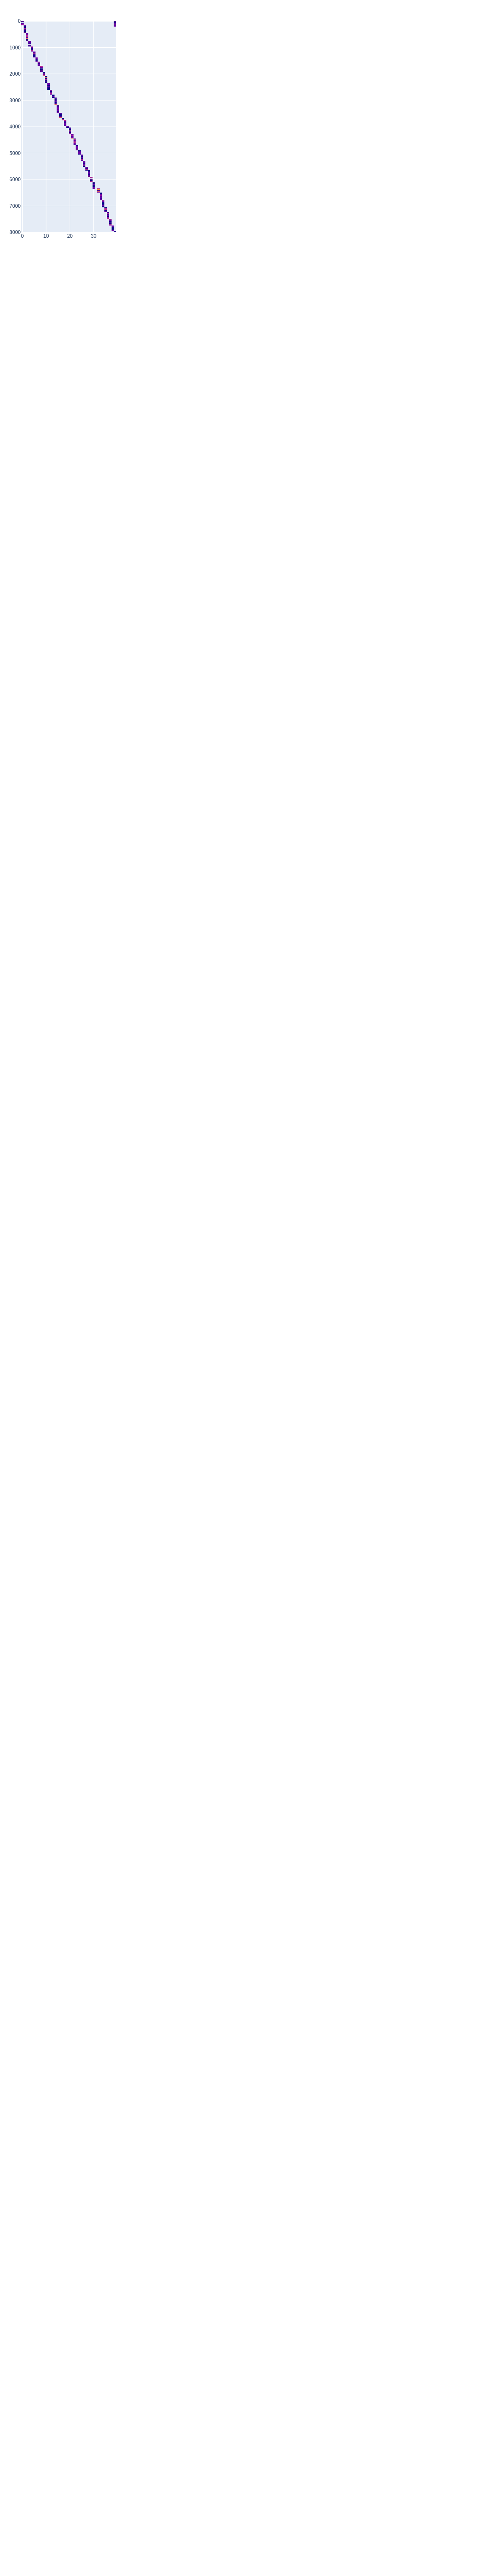

cols: 4  rows: 11
margin: 50  paper height: 500  paper width: 225
total height: 6100  total width: 1150


In [29]:
# raise Exception

step = 10
df = celldatas_df.iloc[::step]
cols = 4
rows = len(df)//cols + (1 if len(df)%cols else 0)
margin = 50
paper_height = 500
total_height = (rows+1)*margin + rows*paper_height
vertical_spacing=margin/(total_height - 2*margin)
paper_width = 225
total_width = (cols+1)*margin + cols*paper_width
horizontal_spacing = margin/(total_width - 2*margin)

fig = make_subplots(rows, cols, vertical_spacing=vertical_spacing, horizontal_spacing=horizontal_spacing) 
fig.update_layout(height=total_height, width=total_width)
fig.update_layout(margin=dict(t=margin, b=margin, l=margin, r=margin))
fig.update_yaxes(autorange="reversed")
        
# for i in range(len(df)):
for i in range(1):
    r = df.iloc[i].r
    fig.add_trace(go.Heatmap(z=r, showscale=False), row=i//cols+1, col=i%cols+1)

# fig.show()
fig.show(renderer="png", height=total_height, width=total_width)
print(f"cols: {cols}  rows: {rows}")
print(f"margin: {margin}  paper height: {paper_height}  paper width: {paper_width}")
print(f"total height: {total_height}  total width: {total_width}")

In [2]:
dir()

['In',
 'Out',
 '_',
 '_1',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i2',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'exit',
 'get_ipython',
 'quit']

In [37]:
%history

dir()
dir()
from pathlib import Path
import pprint
import os
import json
import numpy as np
import pandas as pd
import xarray as xr
import jmespath
from brainio_collection import list_stimulus_sets, list_assemblies, get_stimulus_set, get_assembly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from brainio_base.assemblies import NeuronRecordingAssembly
import scipy.io as sio
import re
source_netcdf_file = "/braintree/data2/active/users/jjpr/mkgu_packaging/crcns/v2-1/crcns_v2-1_neuronal.nc"
example_csv_path = Path("/braintree/data2/active/users/jjpr/mkgu_packaging/crcns/v2-1/V2Data10/NatRev/data/e0052.edrev3.001.p1.mat.csv")
example_mat_path = Path("/braintree/data2/active/users/jjpr/mkgu_packaging/crcns/v2-1/V2Data10/NatRev/e0052/e0052.edrev3.001.p1.mat")
v2_path = example_csv_path.parents[3]
v2_path
summaries_glob = sorted(v2_path.glob("V2Data*/**/*summary_file.mat"))
[f.relative_to(v2_path) for f in summaries_glob]
len(summaries

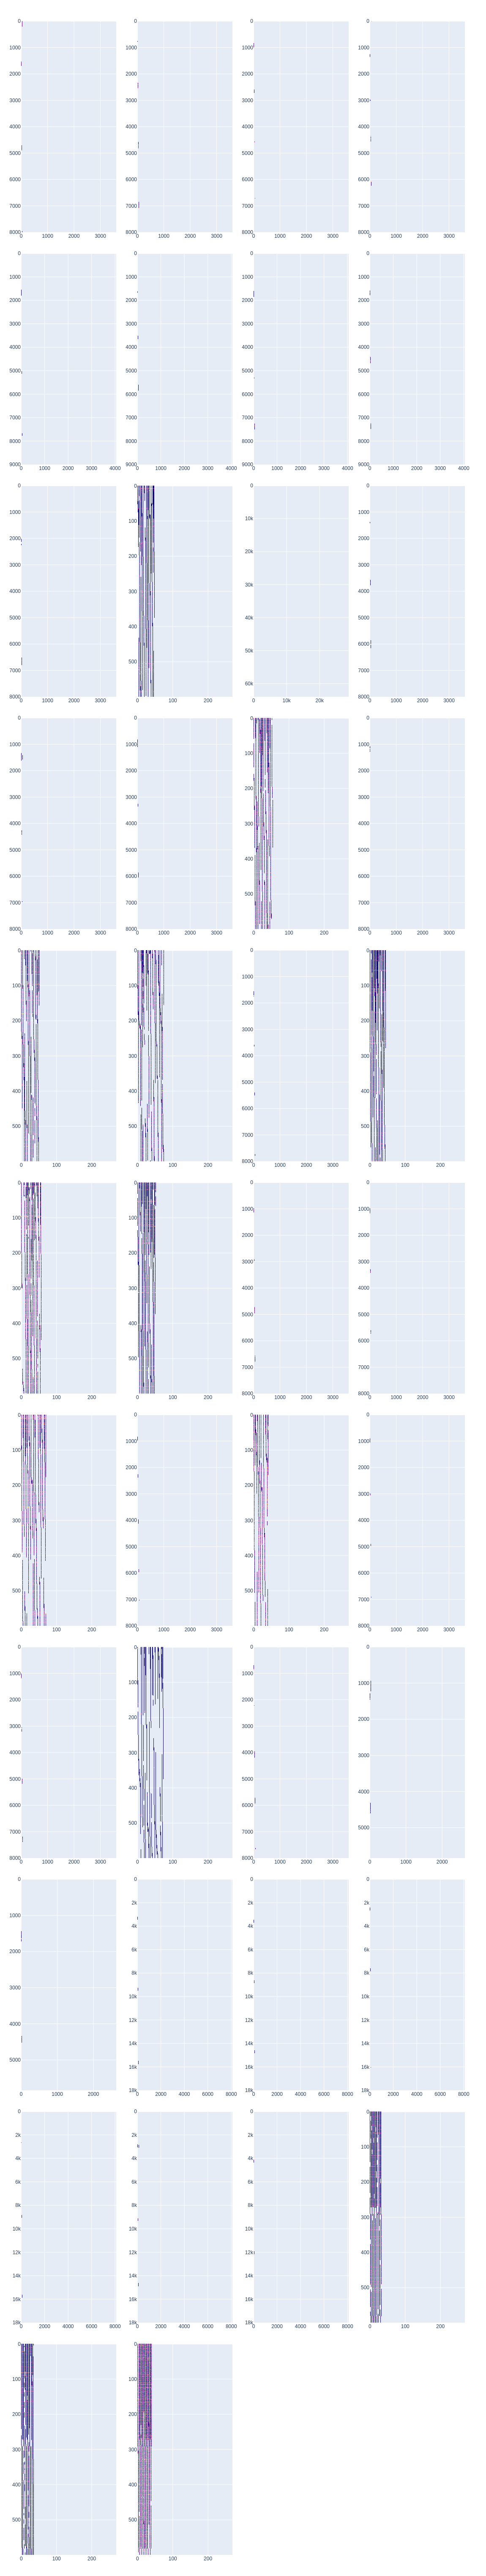

cols: 4  rows: 11
margin: 50  paper height: 500  paper width: 225
total height: 6100  total width: 1150


In [39]:
step = 10
df = celldatas_df.iloc[::step]
cols = 4
rows = len(df)//cols + (1 if len(df)%cols else 0)
margin = 50
paper_height = 500
total_height = (rows+1)*margin + rows*paper_height
vertical_spacing=margin/(total_height - 2*margin)
paper_width = 225
total_width = (cols+1)*margin + cols*paper_width
horizontal_spacing = margin/(total_width - 2*margin)

fig = make_subplots(rows, cols, vertical_spacing=vertical_spacing, horizontal_spacing=horizontal_spacing) 
fig.update_layout(height=total_height, width=total_width)
fig.update_layout(margin=dict(t=margin, b=margin, l=margin, r=margin))
fig.update_yaxes(autorange="reversed")
        
for i in range(len(df)):
    r = df.iloc[i].r
    fig.add_trace(go.Heatmap(z=r, showscale=False), row=i//cols+1, col=i%cols+1)

for k in fig.layout:
    if k.startswith("yaxis"):
        ax = fig.layout[k]
        ax["scaleanchor"] = ax["anchor"]
        ax["constrain"] = "range"
        ax["constraintoward"] = "top"

for k in fig.layout:
    if k.startswith("xaxis"):
        ax = fig.layout[k]
        ax["constrain"] = "range"
        ax["constraintoward"] = "left"

fig.show(renderer="png", height=total_height, width=total_width)
print(f"cols: {cols}  rows: {rows}")
print(f"margin: {margin}  paper height: {paper_height}  paper width: {paper_width}")
print(f"total height: {total_height}  total width: {total_width}")

In [36]:
[(k, fig.layout[k]["anchor"]) for k in fig.layout if k.startswith("yaxis")]

[('yaxis21', 'x21'),
 ('yaxis41', 'x41'),
 ('yaxis3', 'x3'),
 ('yaxis35', 'x35'),
 ('yaxis36', 'x36'),
 ('yaxis2', 'x2'),
 ('yaxis11', 'x11'),
 ('yaxis40', 'x40'),
 ('yaxis22', 'x22'),
 ('yaxis14', 'x14'),
 ('yaxis19', 'x19'),
 ('yaxis5', 'x5'),
 ('yaxis38', 'x38'),
 ('yaxis7', 'x7'),
 ('yaxis31', 'x31'),
 ('yaxis6', 'x6'),
 ('yaxis15', 'x15'),
 ('yaxis18', 'x18'),
 ('yaxis20', 'x20'),
 ('yaxis23', 'x23'),
 ('yaxis26', 'x26'),
 ('yaxis34', 'x34'),
 ('yaxis8', 'x8'),
 ('yaxis', 'x'),
 ('yaxis4', 'x4'),
 ('yaxis13', 'x13'),
 ('yaxis30', 'x30'),
 ('yaxis9', 'x9'),
 ('yaxis32', 'x32'),
 ('yaxis43', 'x43'),
 ('yaxis29', 'x29'),
 ('yaxis17', 'x17'),
 ('yaxis16', 'x16'),
 ('yaxis39', 'x39'),
 ('yaxis28', 'x28'),
 ('yaxis25', 'x25'),
 ('yaxis12', 'x12'),
 ('yaxis24', 'x24'),
 ('yaxis10', 'x10'),
 ('yaxis27', 'x27'),
 ('yaxis33', 'x33'),
 ('yaxis37', 'x37'),
 ('yaxis44', 'x44'),
 ('yaxis42', 'x42')]

In [33]:
fig.data[-1]

Heatmap({
    'showscale': False,
    'xaxis': 'x',
    'yaxis': 'y',
    'z': array([[ 1., nan, nan, ..., nan, nan,  0.],
                [ 0., nan, nan, ..., nan, nan,  0.],
                [ 1., nan, nan, ..., nan, nan,  1.],
                ...,
                [nan, nan, nan, ..., nan, nan,  1.],
                [nan, nan, nan, ..., nan, nan,  0.],
                [nan, nan, nan, ..., nan, nan,  2.]])
})